# Group Members

1) Mustafa Ahmed Khan       CS20116

2. Syed Muhammad Kazim CS20128

3. Muhammad Hassan Farooqui CS20137

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import warnings
sns.set_theme(style="dark")
warnings.simplefilter('ignore')

## Data Import

In [75]:
df = pd.read_csv("D:\\downloads D\\archive (1)\\weatherHistory.csv")
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


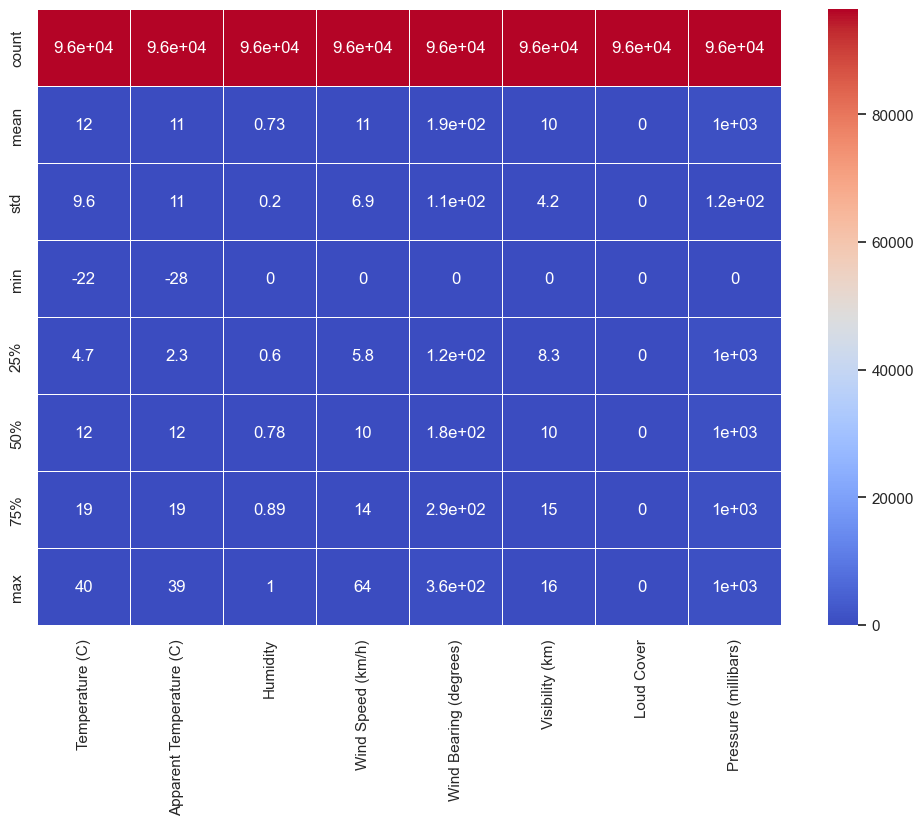

In [76]:
plt.figure(figsize=(12,8))
sns.heatmap(df.describe(), annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

In [77]:
df['Daily Summary'].value_counts()

Daily Summary
Mostly cloudy throughout the day.                                                                       20085
Partly cloudy throughout the day.                                                                        9981
Partly cloudy until night.                                                                               6169
Partly cloudy starting in the morning.                                                                   5184
Foggy in the morning.                                                                                    4201
                                                                                                        ...  
Breezy starting overnight continuing until morning and foggy overnight.                                    24
Mostly cloudy throughout the day and breezy starting overnight continuing until afternoon.                 24
Partly cloudy starting in the morning and breezy starting in the afternoon continuing until evening.      

## Pre Processing

In [78]:
df.drop('Daily Summary',axis=1,inplace=True)
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51


In [79]:
df['Loud Cover'].sum()

0.0

In [80]:
df.drop('Loud Cover',axis=1,inplace=True)
df.tail()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95
96452,2016-09-09 23:00:00.000 +0200,Partly Cloudy,rain,20.438889,20.438889,0.61,5.8765,39.0,15.5204,1016.16


In [81]:
df.shape

(96453, 10)

In [82]:
df.drop_duplicates(inplace=True)

In [83]:
df.shape

(96429, 10)

In [84]:
df['Summary'].value_counts()

Summary
Partly Cloudy                          31726
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10873
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Hu

## Mapping

In [85]:
mapping = {
    'Partly Cloudy': 'Cloudy',
    'Mostly Cloudy': 'Cloudy',
    'Overcast': 'Cloudy',
    'Clear': 'Clear',
    'Foggy': 'Foggy',
    'Breezy and Overcast': 'Windy',
    'Breezy and Mostly Cloudy': 'Windy',
    'Breezy and Partly Cloudy': 'Windy',
    'Dry and Partly Cloudy': 'Dry',
    'Windy and Partly Cloudy': 'Windy',
    'Light Rain': 'Rain',
    'Breezy': 'Windy',
    'Windy and Overcast': 'Windy',
    'Humid and Mostly Cloudy': 'Rain',
    'Drizzle': 'Rain',
    'Breezy and Foggy': 'Windy',
    'Windy and Mostly Cloudy': 'Windy',
    'Dry': 'Dry',
    'Humid and Partly Cloudy': 'Rain',
    'Dry and Mostly Cloudy': 'Dry',
    'Rain': 'Rain',
    'Windy': 'Windy',
    'Humid and Overcast': 'Rain',
    'Windy and Foggy': 'Windy',
    'Windy and Dry': 'Windy',
    'Dangerously Windy and Partly Cloudy': 'Windy',
    'Breezy and Dry': 'Windy'
}
df['Summary'] = df['Summary'].map(mapping)

In [86]:
df['Summary'].value_counts()

Summary
Cloudy    76417
Clear     10873
Foggy      7148
Windy      1681
Rain        176
Dry         134
Name: count, dtype: int64

In [87]:
df.isna().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
dtype: int64

In [88]:
df['Precip Type'].value_counts()

Precip Type
rain    85200
snow    10712
Name: count, dtype: int64

In [89]:
df.dropna(inplace=True)

In [90]:
df.isna().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
dtype: int64

In [91]:
df.drop('Formatted Date',axis=1,inplace=True)


In [92]:
df.describe(include=['object'])

,Summary,Precip Type
count,95912,95912
unique,6,2
top,Cloudy,rain
freq,76058,85200


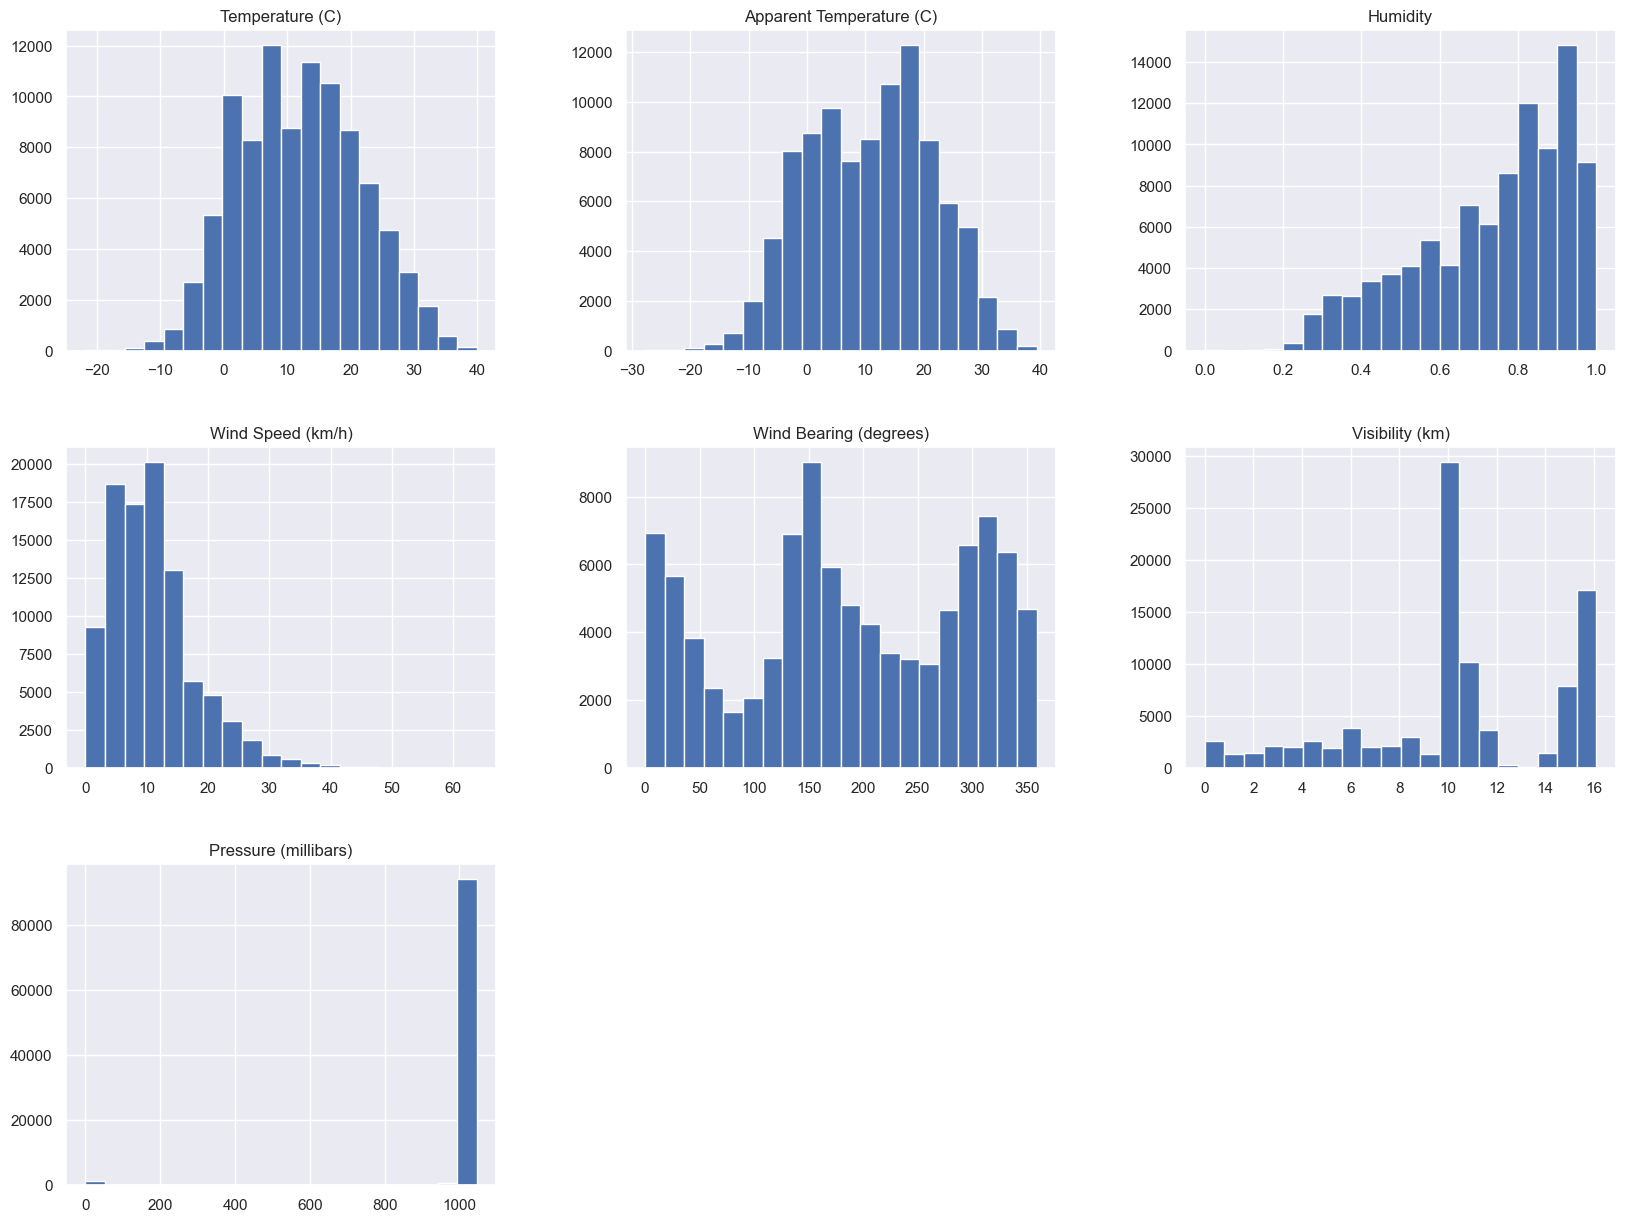

<Figure size 640x480 with 0 Axes>

In [93]:
df.hist(figsize=(20,15),bins=20)
plt.figure()
plt.show()


Encoding

In [94]:

encoder = LabelEncoder()

df['Precip Type'] = encoder.fit_transform(df['Precip Type'])
df['Summary'] = encoder.fit_transform(df['Summary'])


Checking if Pressure can be dropped

In [95]:
print(((df['Pressure (millibars)'] > 800) & (df['Pressure (millibars)'] < 1200)).sum())
df[((df['Pressure (millibars)'] > 800) & (df['Pressure (millibars)'] < 1200))]['Summary'].value_counts()

94624


Summary
1    75647
0    10018
3     7019
5     1630
4      176
2      134
Name: count, dtype: int64

In [96]:
print(((df['Pressure (millibars)'] < 800)).sum())
df[((df['Pressure (millibars)'] < 800))]['Summary'].value_counts()

1288


Summary
0    728
1    411
3     98
5     51
Name: count, dtype: int64

In [97]:
df.drop('Pressure (millibars)',axis=1,inplace=True)

In [98]:
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km)
0,1,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263
1,1,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263
2,1,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569
3,1,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263
4,1,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263


In [99]:
def classification_report_metrics(y_true, y_pred):
    accuracy = round(accuracy_score(y_true, y_pred), 3)
    precision = round(precision_score(y_true, y_pred, average='weighted'), 3)
    recall = round(recall_score(y_true, y_pred, average='weighted'), 3)
    f1 = round(f1_score(y_true, y_pred, average='weighted'), 3)
    print(classification_report(y_true, y_pred))
    print()
    cm = confusion_matrix(y_true, y_pred)
    labels = [0,1,2,3,4,5]
    plt.figure(figsize=(10, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    return accuracy, precision, recall, f1


Model Class

In [100]:
class Model:

    def __init__(self,name, accuracy, precision, recall, f1):
        self.name = name
        self.accuracy = accuracy
        self.precision = precision
        self.recall = recall
        self.f1 = f1


In [101]:
models = []

In [102]:
y = df["Summary"]
df.drop('Summary',axis=1,inplace=True)
X = df

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [104]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Algorithm 1: K Nearest Neighbors

Model 1

Train Accuracy 0.8856087461646162
              precision    recall  f1-score   support

           0       0.41      0.09      0.15      3207
           1       0.88      0.98      0.92     22855
           2       0.40      0.05      0.10        37
           3       0.94      0.94      0.94      2107
           4       0.67      0.06      0.10        72
           5       0.96      0.83      0.89       496

    accuracy                           0.87     28774
   macro avg       0.71      0.49      0.52     28774
weighted avg       0.83      0.87      0.83     28774




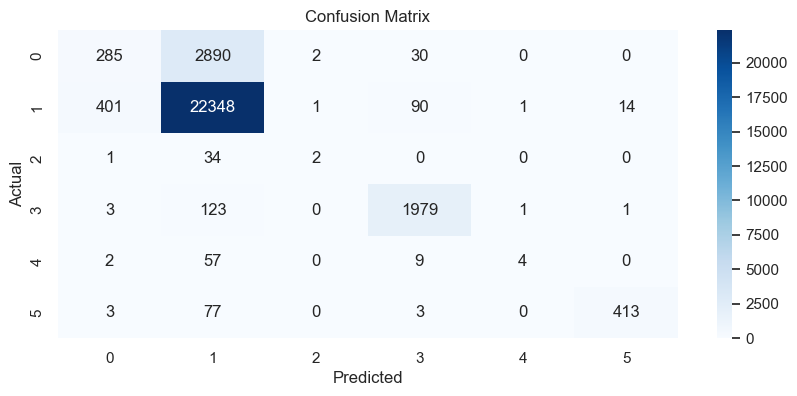

0.87
0.835


In [105]:
model1 = KNeighborsClassifier(n_neighbors=9,leaf_size=40)
model1.fit(X_train,y_train)
y_pred = model1.predict(X_train)
tac = accuracy_score(y_train,y_pred)
print('Train Accuracy',tac)
y_pred = model1.predict(X_test)
accuracy, precision, recall, f1 = classification_report_metrics(y_test,y_pred)
models.append([Model("Model-1",accuracy, precision, recall, f1),tac])
print(accuracy)
print(f1)

Model 2

Train Accuracy 0.9997467901933331
              precision    recall  f1-score   support

           0       0.32      0.20      0.25      3207
           1       0.88      0.93      0.91     22855
           2       0.31      0.22      0.25        37
           3       0.94      0.94      0.94      2107
           4       0.33      0.12      0.18        72
           5       0.94      0.87      0.90       496

    accuracy                           0.85     28774
   macro avg       0.62      0.55      0.57     28774
weighted avg       0.82      0.85      0.83     28774




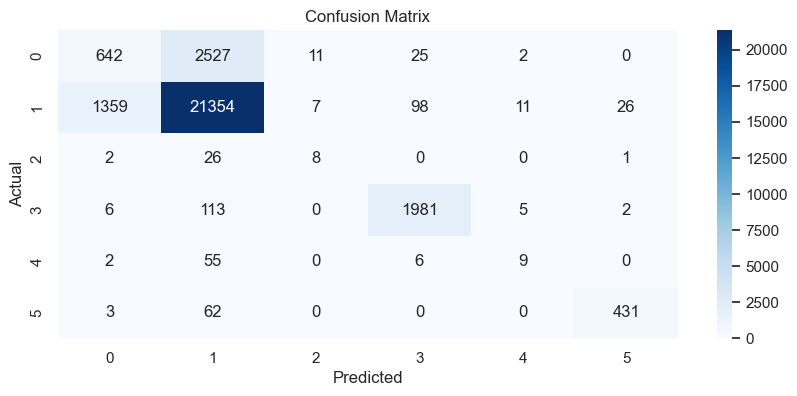

0.849
0.834


In [106]:
# Overfitted
model2 = KNeighborsClassifier(n_neighbors=3,weights='distance',p=2)
model2.fit(X_train,y_train)
y_pred = model2.predict(X_train)
tac = accuracy_score(y_train,y_pred)
print('Train Accuracy',tac)
y_pred = model2.predict(X_test)
accuracy, precision, recall, f1 = classification_report_metrics(y_test,y_pred)
models.append([Model("Model-2",accuracy, precision, recall, f1),tac])
print(accuracy)
print(f1)

Model 3

Train Accuracy 0.8874854776728529
              precision    recall  f1-score   support

           0       0.38      0.11      0.16      3207
           1       0.88      0.97      0.92     22855
           2       0.43      0.08      0.14        37
           3       0.94      0.94      0.94      2107
           4       0.40      0.06      0.10        72
           5       0.95      0.85      0.90       496

    accuracy                           0.87     28774
   macro avg       0.66      0.50      0.53     28774
weighted avg       0.83      0.87      0.84     28774




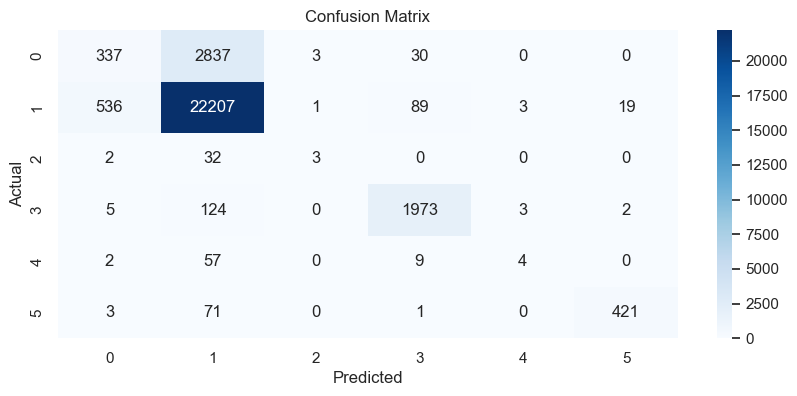

0.867
0.835


In [107]:
model3 = KNeighborsClassifier(n_neighbors=7,leaf_size=40,p=2)
model3.fit(X_train,y_train)
y_pred = model3.predict(X_train)
tac = accuracy_score(y_train,y_pred)
print('Train Accuracy',tac)
y_pred = model3.predict(X_test)
accuracy, precision, recall, f1 = classification_report_metrics(y_test,y_pred)
models.append([Model("Model-3",accuracy, precision, recall, f1),tac])
print(accuracy)
print(f1)

In [233]:
def drawTable(ls2):
    return pd.DataFrame({
    'Model Name':[i[0].name for i in ls2],
    'Training Accuracy':[i[0].accuracy for i in ls2],
    'Precisioon':[i[0].precision for i in ls2],
    'recall':[i[0].recall for i in ls2],
    'F1 Score':[i[0].f1 for i in ls2],
}).set_index('Model Name')
# print(models)
drawTable(models)

,Training Accuracy,Precisioon,recall,F1 Score
Model Name,,,,
Model-1,0.870,0.828,0.870,0.835
Model-2,0.849,0.824,0.849,0.834
Model-3,0.867,0.826,0.867,0.835


Text(0.5, 1.0, 'F1 - Score')

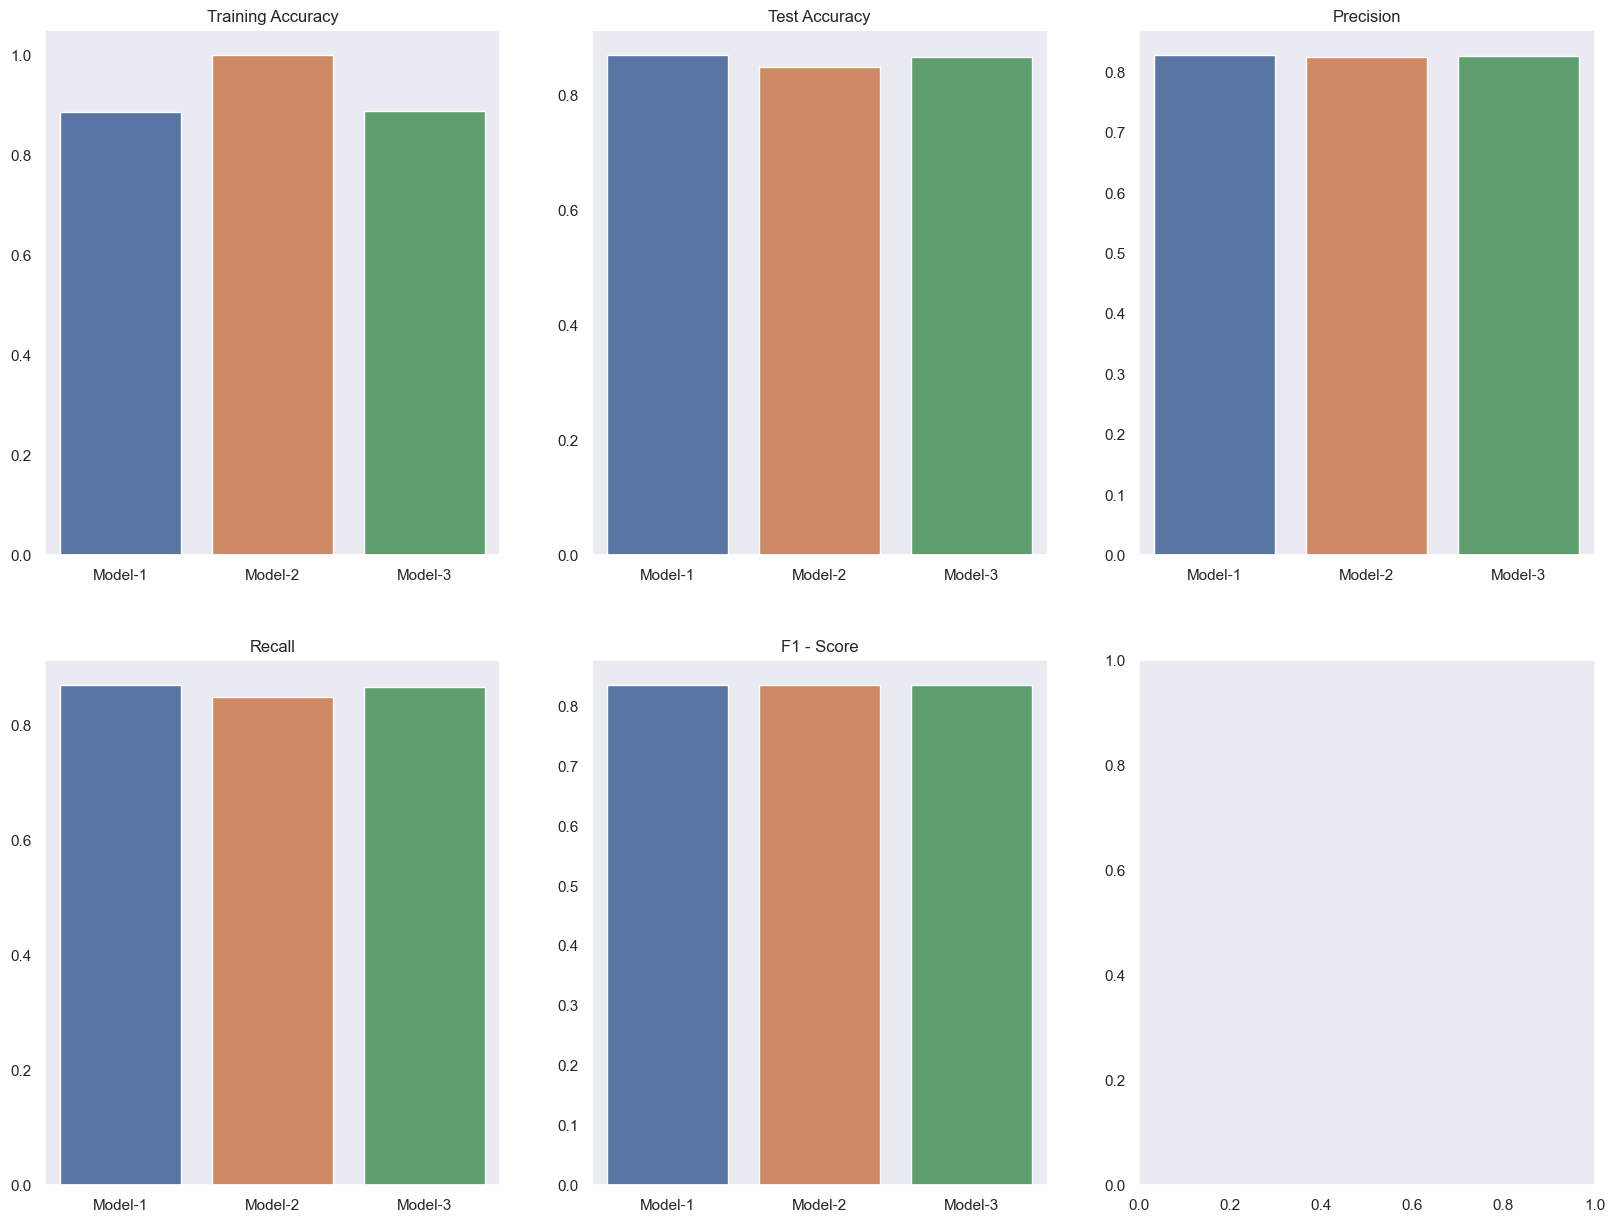

In [234]:
fig, axes = plt.subplots(2, 3, figsize=(20,15))
g = sns.barplot(x=[i[0].name for i in models],y=[i[1] for i in models],ax= axes[0,0])
g.set_title("Training Accuracy")
g = sns.barplot(x=[i[0].name for i in models],y=[i[0].accuracy for i in models],ax=axes[0,1])
g.set_title("Test Accuracy")
g = sns.barplot(x=[i[0].name for i in models],y=[i[0].precision for i in models],ax=axes[0,2])
g.set_title("Precision")
g = sns.barplot(x=[i[0].name for i in models],y=[i[0].recall for i in models],ax=axes[1,0])
g.set_title("Recall")
g = sns.barplot(x=[i[0].name for i in models],y=[i[0].f1 for i in models],ax=axes[1,1])
g.set_title("F1 - Score")


## Algorithm 2: Decision Tree Classifier

In [218]:
models2 = []

Model 1

Train Accuracy 0.8882451070928535
              precision    recall  f1-score   support

           0       0.50      0.05      0.09      3207
           1       0.88      0.99      0.93     22855
           2       0.40      0.11      0.17        37
           3       1.00      1.00      1.00      2107
           4       0.40      0.03      0.05        72
           5       0.96      0.90      0.93       496

    accuracy                           0.88     28774
   macro avg       0.69      0.51      0.53     28774
weighted avg       0.84      0.88      0.84     28774




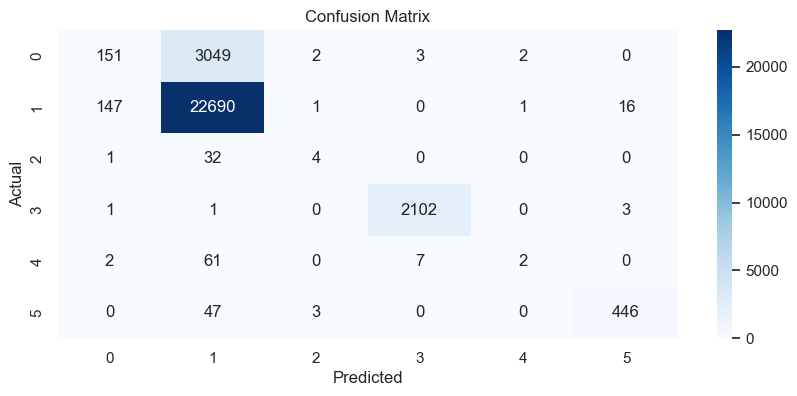

0.883
0.839


In [219]:
model4 = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=5, random_state=2)
model4.fit(X_train,y_train)
y_pred = model4.predict(X_train)
tac = accuracy_score(y_train,y_pred)
print('Train Accuracy',tac)
y_pred = model4.predict(X_test)
accuracy, precision, recall, f1 = classification_report_metrics(y_test,y_pred)
models2.append([Model("Model-1",accuracy, precision, recall, f1),tac])
print(accuracy)
print(f1)

Model 2

Train Accuracy 0.8877088980905001
              precision    recall  f1-score   support

           0       0.55      0.05      0.09      3207
           1       0.88      0.99      0.93     22855
           2       0.35      0.16      0.22        37
           3       0.99      1.00      1.00      2107
           4       0.73      0.15      0.25        72
           5       0.96      0.92      0.94       496

    accuracy                           0.88     28774
   macro avg       0.75      0.55      0.57     28774
weighted avg       0.85      0.88      0.84     28774




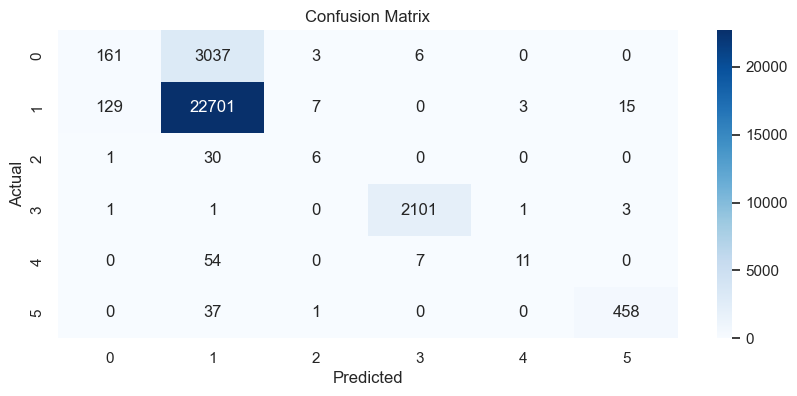

0.884
0.841


In [220]:
model5 = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=5, random_state=2)
model5.fit(X_train,y_train)
y_pred = model5.predict(X_train)
tac = accuracy_score(y_train,y_pred)
print('Train Accuracy',tac)
y_pred = model5.predict(X_test)
accuracy, precision, recall, f1 = classification_report_metrics(y_test,y_pred)
models2.append([Model("Model-2",accuracy, precision, recall, f1),tac])
print(accuracy)
print(f1)

Model 3

Train Accuracy 0.8877088980905001
              precision    recall  f1-score   support

           0       0.55      0.05      0.09      3207
           1       0.88      0.99      0.93     22855
           2       0.35      0.16      0.22        37
           3       0.99      1.00      1.00      2107
           4       0.73      0.15      0.25        72
           5       0.96      0.92      0.94       496

    accuracy                           0.88     28774
   macro avg       0.75      0.55      0.57     28774
weighted avg       0.85      0.88      0.84     28774




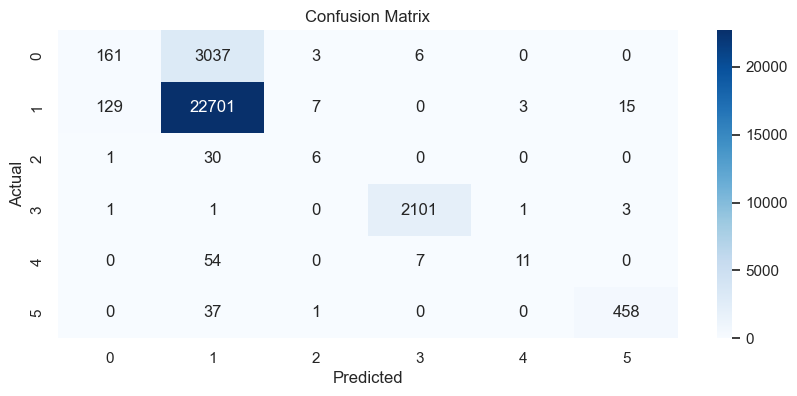

0.884
0.841


In [221]:
model6 = DecisionTreeClassifier(criterion='log_loss', max_depth=10, min_samples_split=5, random_state=2)
model6.fit(X_train,y_train)
y_pred = model6.predict(X_train)
tac = accuracy_score(y_train,y_pred)
print('Train Accuracy',tac)
y_pred = model6.predict(X_test)
accuracy, precision, recall, f1 = classification_report_metrics(y_test,y_pred)
models2.append([Model("Model-3",accuracy, precision, recall, f1),tac])
print(accuracy)
print(f1)

,Training Accuracy,Precisioon,recall,F1 Score
Model Name,,,,
Model-1,0.883,0.843,0.883,0.839
Model-2,0.884,0.850,0.884,0.841
Model-3,0.884,0.850,0.884,0.841


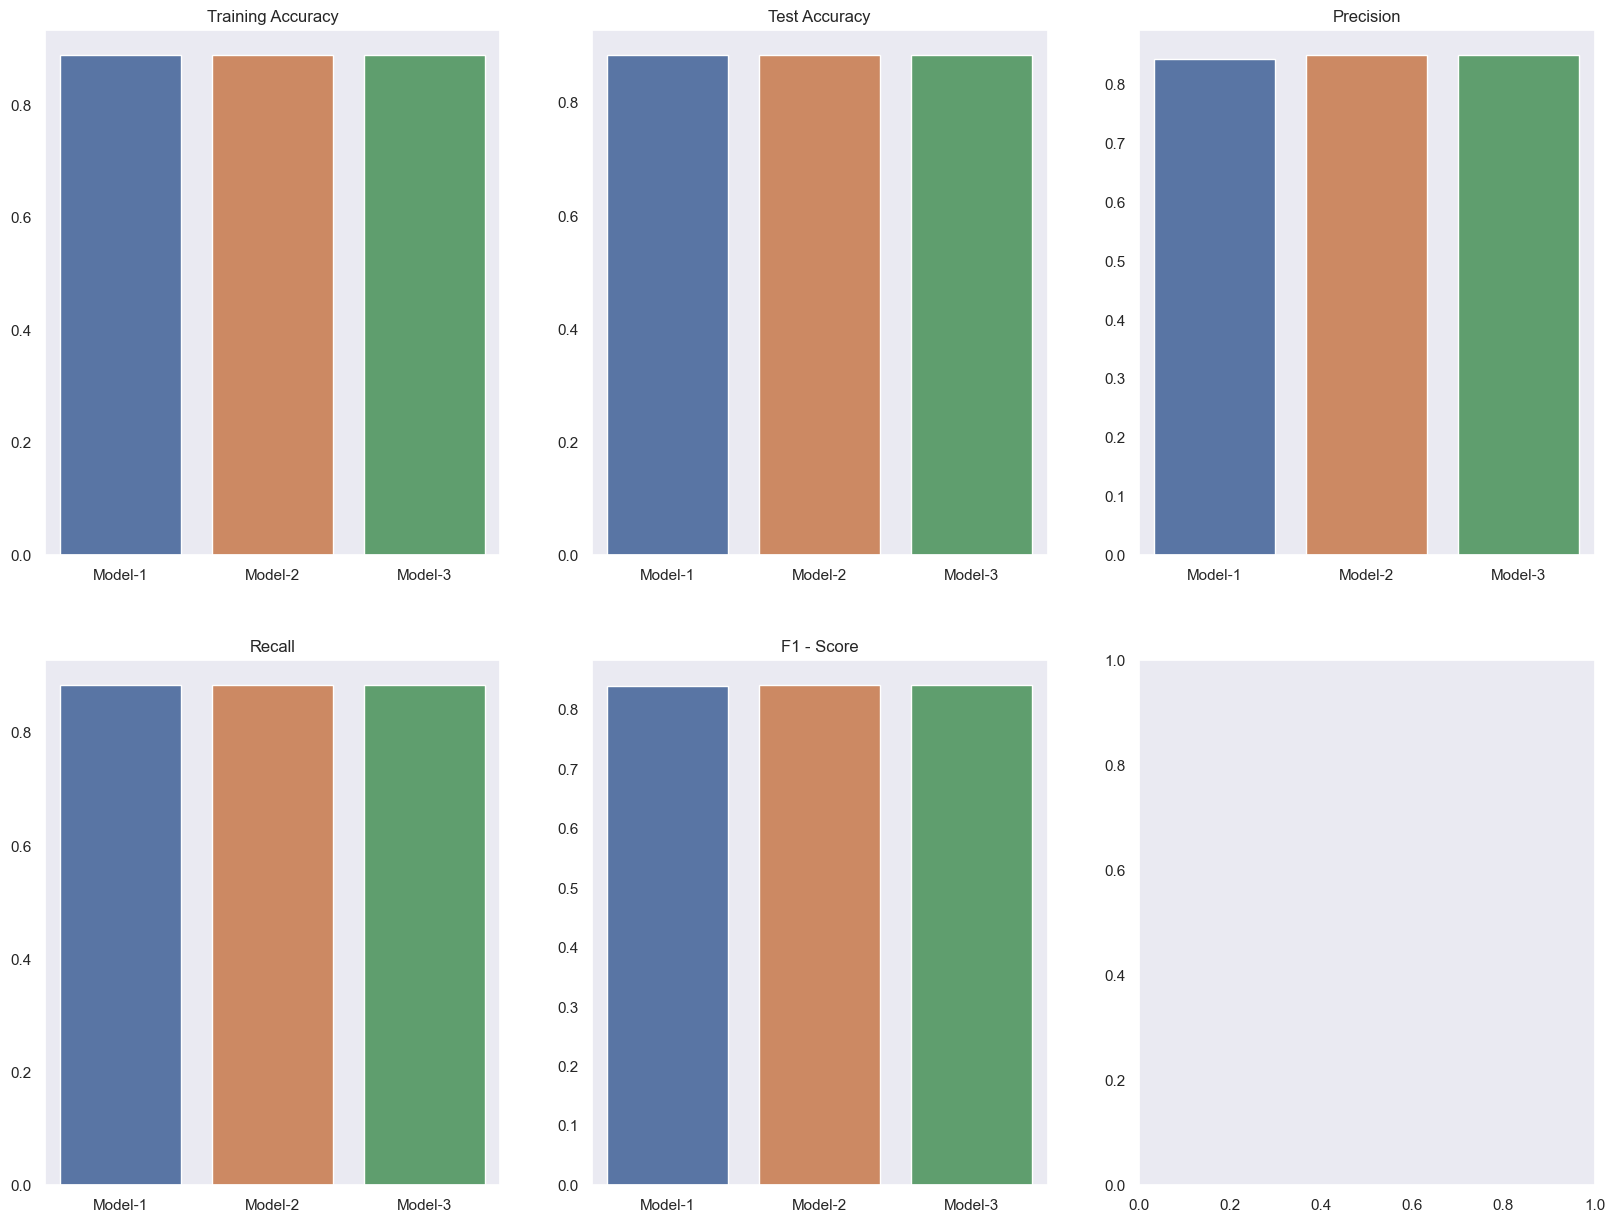

In [222]:
fig, axes = plt.subplots(2, 3, figsize=(20,15))
g = sns.barplot(x=[i[0].name for i in models2],y=[i[1] for i in models2],ax= axes[0,0])
g.set_title("Training Accuracy")
g = sns.barplot(x=[i[0].name for i in models2],y=[i[0].accuracy for i in models2],ax=axes[0,1])
g.set_title("Test Accuracy")
g = sns.barplot(x=[i[0].name for i in models2],y=[i[0].precision for i in models2],ax=axes[0,2])
g.set_title("Precision")
g = sns.barplot(x=[i[0].name for i in models2],y=[i[0].recall for i in models2],ax=axes[1,0])
g.set_title("Recall")
g = sns.barplot(x=[i[0].name for i in models2],y=[i[0].f1 for i in models2],ax=axes[1,1])
g.set_title("F1 - Score")
drawTable(models2)

In [223]:
models3 = []

## Algorithm 3: Logistic Regression

Model 1:

Train Accuracy 0.8384819327355596
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3207
           1       0.85      0.98      0.91     22855
           2       0.00      0.00      0.00        37
           3       0.80      0.69      0.74      2107
           4       0.00      0.00      0.00        72
           5       0.39      0.32      0.35       496

    accuracy                           0.84     28774
   macro avg       0.34      0.33      0.33     28774
weighted avg       0.74      0.84      0.78     28774




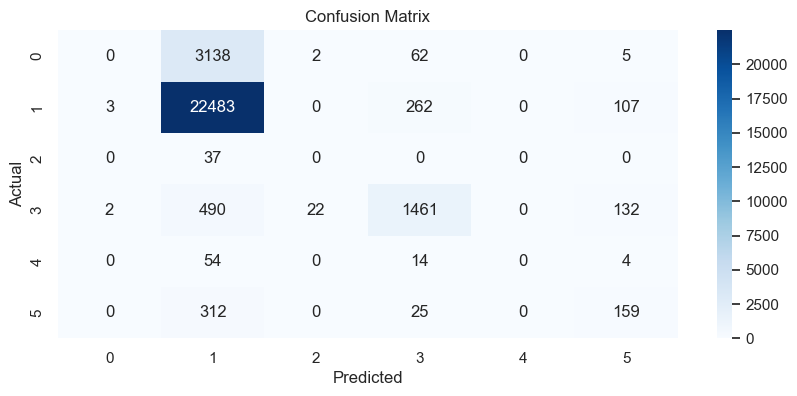

0.838
0.784


In [224]:
model7 = LogisticRegression()
model7.fit(X_train,y_train)
y_pred = model7.predict(X_train)
tac = accuracy_score(y_train,y_pred)
print('Train Accuracy',tac)
y_pred = model7.predict(X_test)
accuracy, precision, recall, f1 = classification_report_metrics(y_test,y_pred)
models3.append([Model("Model-1",accuracy, precision, recall, f1),tac])
print(accuracy)
print(f1)

Model 2

Train Accuracy 0.8603175548869493
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3207
           1       0.86      0.99      0.92     22855
           2       0.00      0.00      0.00        37
           3       0.91      0.84      0.87      2107
           4       0.00      0.00      0.00        72
           5       0.72      0.50      0.59       496

    accuracy                           0.86     28774
   macro avg       0.41      0.39      0.40     28774
weighted avg       0.76      0.86      0.80     28774




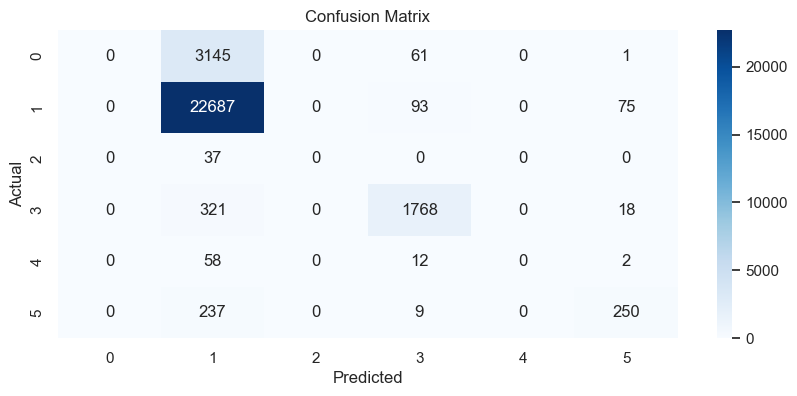

0.859
0.805


In [225]:
model8 = LogisticRegression(solver='saga')
model8.fit(X_train,y_train)
y_pred = model8.predict(X_train)
tac = accuracy_score(y_train,y_pred)
print('Train Accuracy',tac)
y_pred = model8.predict(X_test)
accuracy, precision, recall, f1 = classification_report_metrics(y_test,y_pred)
models3.append([Model("Model-2",accuracy, precision, recall, f1),tac])
print(accuracy)
print(f1)

Model 3:

Train Accuracy 0.8662456433018558
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3207
           1       0.86      0.99      0.92     22855
           2       0.00      0.00      0.00        37
           3       0.94      0.89      0.91      2107
           4       0.00      0.00      0.00        72
           5       0.79      0.57      0.66       496

    accuracy                           0.87     28774
   macro avg       0.43      0.41      0.42     28774
weighted avg       0.77      0.87      0.81     28774




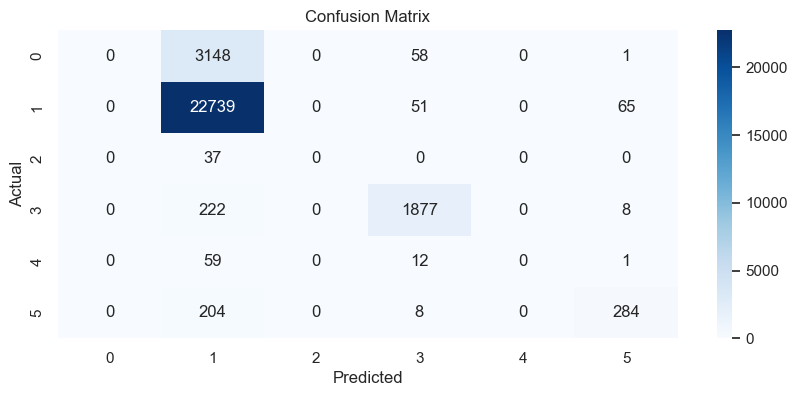

0.865
0.812


In [226]:
model9 = LogisticRegression(penalty='l2', C=1.0, solver='sag', random_state=0)    #c=1/lamda
model9.fit(X_train,y_train)
y_pred = model9.predict(X_train)
tac = accuracy_score(y_train,y_pred)
print('Train Accuracy',tac)
y_pred = model9.predict(X_test)
accuracy, precision, recall, f1 = classification_report_metrics(y_test,y_pred)
models3.append([Model("Model-3",accuracy, precision, recall, f1),tac])
print(accuracy)
print(f1)

,Training Accuracy,Precisioon,recall,F1 Score
Model Name,,,,
Model-1,0.838,0.739,0.838,0.784
Model-2,0.859,0.759,0.859,0.805
Model-3,0.865,0.766,0.865,0.812


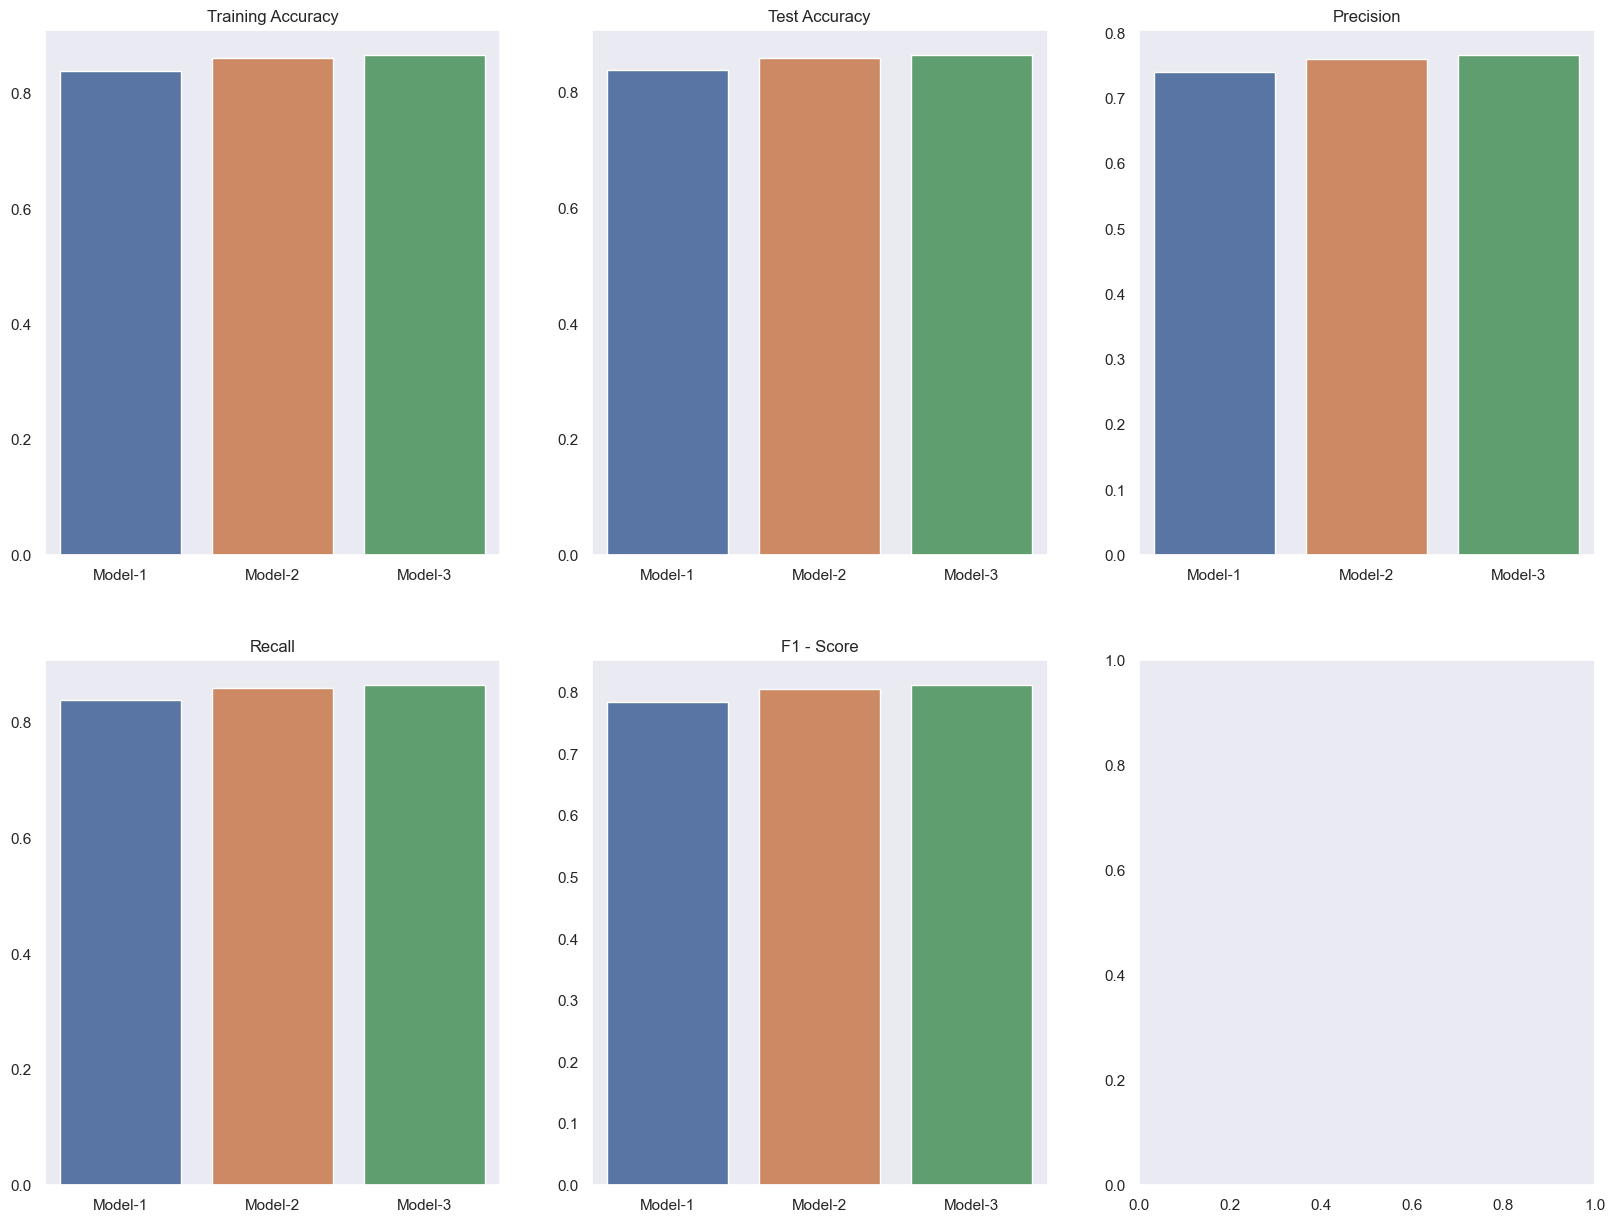

In [232]:
fig, axes = plt.subplots(2, 3, figsize=(20,15))
g = sns.barplot(x=[i[0].name for i in models3],y=[i[1] for i in models3],ax= axes[0,0])
g.set_title("Training Accuracy")
g = sns.barplot(x=[i[0].name for i in models3],y=[i[0].accuracy for i in models3],ax=axes[0,1])
g.set_title("Test Accuracy")
g = sns.barplot(x=[i[0].name for i in models3],y=[i[0].precision for i in models3],ax=axes[0,2])
g.set_title("Precision")
g = sns.barplot(x=[i[0].name for i in models3],y=[i[0].recall for i in models3],ax=axes[1,0])
g.set_title("Recall")
g = sns.barplot(x=[i[0].name for i in models3],y=[i[0].f1 for i in models3],ax=axes[1,1])
g.set_title("F1 - Score")
drawTable(models3)

## SVC Implementation. Dropped due to more learning time, but same accuracy as logistic regression.

In [119]:
# from sklearn.svm import SVC

# moddle = SVC()
# moddle.fit(X_train,y_train)
# y_pred = moddle.predict(X_train)
# tac = accuracy_score(y_train,y_pred)
# print('Train Accuracy',tac)
# y_pred = moddle.predict(X_test)
# accuracy, precision, recall, f1 = classification_report_metrics(y_test,y_pred)
# # models3.append([Model("Model-9",accuracy, precision, recall, f1),tac])
# print(accuracy)
# print(f1)

In [120]:
# moddle = SVC(degree=2,kernel='poly')
# moddle.fit(X_train,y_train)
# y_pred = moddle.predict(X_train)
# tac = accuracy_score(y_train,y_pred)
# print('Train Accuracy',tac)
# y_pred = moddle.predict(X_test)
# accuracy, precision, recall, f1 = classification_report_metrics(y_test,y_pred)
# # models3.append([Model("Model-9",accuracy, precision, recall, f1),tac])
# print(accuracy)
# print(f1)

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
X_test_, X_val, y_test_, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=2)
y_train_ = tf.one_hot(y_train,6)
y_test_ = tf.one_hot(y_test,6)
y_val_ = tf.one_hot(y_val,6)

## Algorithm 4: Artificial Neural Network

In [227]:
models4=[]

Model 1

In [207]:
model10 = tf.keras.Sequential()
model10.add(tf.keras.layers.Dense(20, input_shape=(7,)))
model10.add(tf.keras.layers.Dense(40,activation='relu'))
model10.add(tf.keras.layers.Dense(40,activation='relu'))
model10.add(tf.keras.layers.Dense(20,activation='relu'))
model10.add(tf.keras.layers.Dense(6,activation='softmax'))

In [208]:
model10.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']
)

In [209]:
model10.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 20)                160       
                                                                 
 dense_34 (Dense)            (None, 40)                840       
                                                                 
 dense_35 (Dense)            (None, 40)                1640      
                                                                 
 dense_36 (Dense)            (None, 20)                820       
                                                                 
 dense_37 (Dense)            (None, 6)                 126       
                                                                 
Total params: 3586 (14.01 KB)
Trainable params: 3586 (14.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [210]:
model10_history = model10.fit(X_train.values, y_train_, validation_data=(X_val.values, y_val_), epochs=100, batch_size=256)

Epoch 1/100
263/263 [==============================] - 4s 5ms/step - loss: 1.5519 - accuracy: 0.7840 - val_loss: 0.5761 - val_accuracy: 0.8303
Epoch 2/100
263/263 [==============================] - 1s 4ms/step - loss: 0.5112 - accuracy: 0.8426 - val_loss: 0.4873 - val_accuracy: 0.8496
Epoch 3/100
263/263 [==============================] - 1s 4ms/step - loss: 0.4626 - accuracy: 0.8487 - val_loss: 0.4964 - val_accuracy: 0.8376
Epoch 4/100
263/263 [==============================] - 1s 5ms/step - loss: 0.4452 - accuracy: 0.8550 - val_loss: 0.4748 - val_accuracy: 0.8399
Epoch 5/100
263/263 [==============================] - 1s 4ms/step - loss: 0.4316 - accuracy: 0.8581 - val_loss: 0.4344 - val_accuracy: 0.8561
Epoch 6/100
263/263 [==============================] - 1s 5ms/step - loss: 0.4180 - accuracy: 0.8610 - val_loss: 0.4201 - val_accuracy: 0.8613
Epoch 7/100
263/263 [==============================] - 1s 5ms/step - loss: 0.4122 - accuracy: 0.8638 - val_loss: 0.4117 - val_accuracy: 0.8674

900/900 [==============================] - 4s 4ms/step
              precision    recall  f1-score   support

           0       0.47      0.06      0.10      3207
           1       0.88      0.99      0.93     22855
           2       0.00      0.00      0.00        37
           3       0.98      0.99      0.98      2107
           4       0.67      0.06      0.10        72
           5       0.94      0.78      0.85       496

    accuracy                           0.88     28774
   macro avg       0.66      0.48      0.49     28774
weighted avg       0.84      0.88      0.84     28774




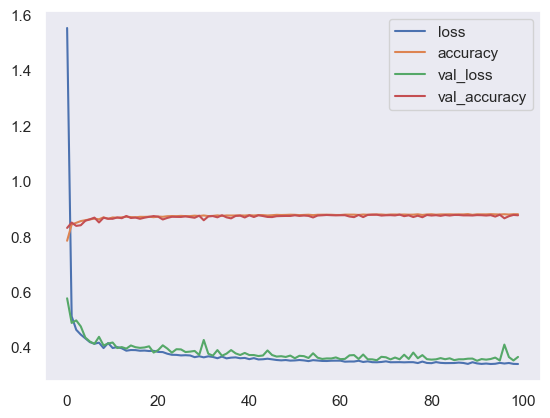

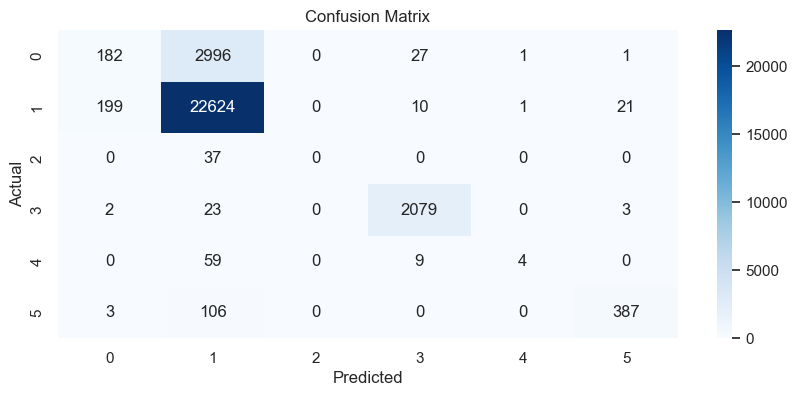

In [228]:
pd.DataFrame(model10_history.history).plot()
yp = model10.predict(X_test).argmax(axis=1)
accuracyAnn, precisionAnn, recallAnn, f1Ann = classification_report_metrics(y_test,yp)
models4.append([Model("Model-1",accuracyAnn, precisionAnn, recallAnn, f1Ann),tac])


Model 2:

In [127]:
model11 = tf.keras.Sequential()
model11.add(tf.keras.layers.Dense(20, input_shape=(7,)))
model11.add(tf.keras.layers.Dense(40,activation='relu'))
model11.add(tf.keras.layers.Dropout(0.1))
model11.add(tf.keras.layers.Dense(40,activation='relu'))
model11.add(tf.keras.layers.Dense(20,activation='relu'))
model11.add(tf.keras.layers.BatchNormalization())
model11.add(tf.keras.layers.Dense(6,activation='softmax'))

In [128]:
model11.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']
)

In [129]:
model11.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 20)                160       
                                                                 
 dense_20 (Dense)            (None, 40)                840       
                                                                 
 dropout_1 (Dropout)         (None, 40)                0         
                                                                 
 dense_21 (Dense)            (None, 40)                1640      
                                                                 
 dense_22 (Dense)            (None, 20)                820       
                                                                 
 batch_normalization_1 (Bat  (None, 20)                80        
 chNormalization)                                                
                                                      

In [130]:
model11_history = model11.fit(X_train.values, y_train_, validation_data=(X_val.values, y_val_), epochs=100, batch_size=256)

Epoch 1/100
263/263 [==============================] - 4s 7ms/step - loss: 1.1987 - accuracy: 0.6632 - val_loss: 0.7075 - val_accuracy: 0.7928
Epoch 2/100
263/263 [==============================] - 1s 5ms/step - loss: 0.5371 - accuracy: 0.8354 - val_loss: 0.5175 - val_accuracy: 0.8232
Epoch 3/100
263/263 [==============================] - 1s 5ms/step - loss: 0.4436 - accuracy: 0.8558 - val_loss: 0.4196 - val_accuracy: 0.8603
Epoch 4/100
263/263 [==============================] - 1s 5ms/step - loss: 0.4207 - accuracy: 0.8610 - val_loss: 0.4207 - val_accuracy: 0.8555
Epoch 5/100
263/263 [==============================] - 1s 5ms/step - loss: 0.4134 - accuracy: 0.8632 - val_loss: 0.4093 - val_accuracy: 0.8643
Epoch 6/100
263/263 [==============================] - 1s 5ms/step - loss: 0.4052 - accuracy: 0.8649 - val_loss: 0.4008 - val_accuracy: 0.8671
Epoch 7/100
263/263 [==============================] - 1s 5ms/step - loss: 0.4010 - accuracy: 0.8666 - val_loss: 0.4025 - val_accuracy: 0.8674

900/900 [==============================] - 5s 5ms/step
              precision    recall  f1-score   support

           0       0.64      0.02      0.04      3207
           1       0.87      1.00      0.93     22855
           2       0.00      0.00      0.00        37
           3       0.98      0.96      0.97      2107
           4       0.00      0.00      0.00        72
           5       1.00      0.59      0.74       496

    accuracy                           0.88     28774
   macro avg       0.58      0.43      0.45     28774
weighted avg       0.85      0.88      0.83     28774




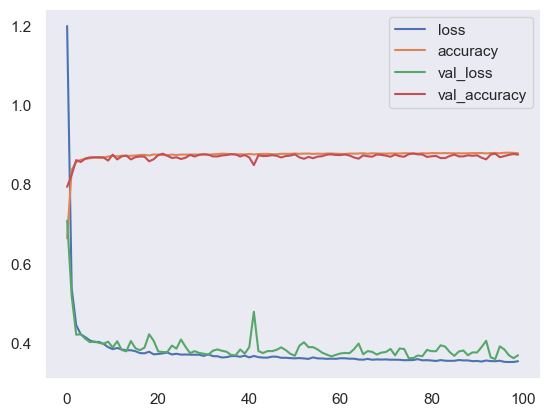

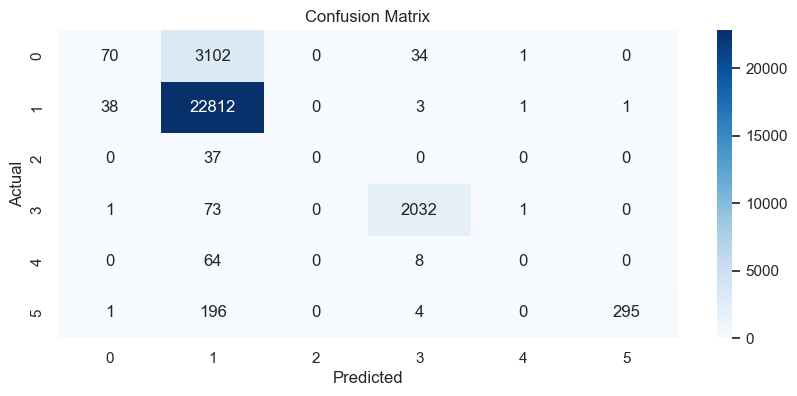

In [229]:
pd.DataFrame(model11_history.history).plot()
yp = model11.predict(X_test).argmax(axis=1)
accuracyAnn, precisionAnn, recallAnn, f1Ann = classification_report_metrics(y_test,yp)
models4.append([Model("Model-2",accuracyAnn, precisionAnn, recallAnn, f1Ann),tac])


Model 3:

In [132]:
inp = tf.keras.Input(shape=(7,))
hid1 = tf.keras.layers.Dense(20, activation='relu')(inp)
hid2 = tf.keras.layers.Dense(40, activation='relu')(hid1)
conc = tf.keras.layers.concatenate([inp,hid2])
hid3 = tf.keras.layers.Dense(20, activation='relu')(conc)
out = tf.keras.layers.Dense(6,activation='softmax')(hid3)

model12 = tf.keras.models.Model(inputs=inp, outputs=out)

In [133]:
model12.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']
)

In [134]:
model12_history = model12.fit(X_train.values, y_train_, validation_data=(X_val.values, y_val_), epochs=100, batch_size=256)

Epoch 1/100
263/263 [==============================] - 2s 4ms/step - loss: 1.8599 - accuracy: 0.7625 - val_loss: 0.5791 - val_accuracy: 0.8202
Epoch 2/100
263/263 [==============================] - 1s 4ms/step - loss: 0.5277 - accuracy: 0.8322 - val_loss: 0.4825 - val_accuracy: 0.8467
Epoch 3/100
263/263 [==============================] - 1s 3ms/step - loss: 0.4558 - accuracy: 0.8536 - val_loss: 0.4591 - val_accuracy: 0.8478
Epoch 4/100
263/263 [==============================] - 1s 3ms/step - loss: 0.4280 - accuracy: 0.8592 - val_loss: 0.4229 - val_accuracy: 0.8602
Epoch 5/100
263/263 [==============================] - 1s 4ms/step - loss: 0.4163 - accuracy: 0.8637 - val_loss: 0.4171 - val_accuracy: 0.8623
Epoch 6/100
263/263 [==============================] - 1s 4ms/step - loss: 0.4063 - accuracy: 0.8665 - val_loss: 0.4275 - val_accuracy: 0.8541
Epoch 7/100
263/263 [==============================] - 1s 4ms/step - loss: 0.4071 - accuracy: 0.8653 - val_loss: 0.4164 - val_accuracy: 0.8648

In [173]:
yp = model12.predict(X_test).argmax(axis=1)
accuracy_score(y_test,yp)

900/900 [==============================] - 3s 3ms/step


0.8785709320914714

900/900 [==============================] - 4s 4ms/step
              precision    recall  f1-score   support

           0       0.55      0.02      0.04      3207
           1       0.87      0.99      0.93     22855
           2       0.00      0.00      0.00        37
           3       0.97      0.97      0.97      2107
           4       0.00      0.00      0.00        72
           5       0.85      0.93      0.88       496

    accuracy                           0.88     28774
   macro avg       0.54      0.49      0.47     28774
weighted avg       0.84      0.88      0.83     28774




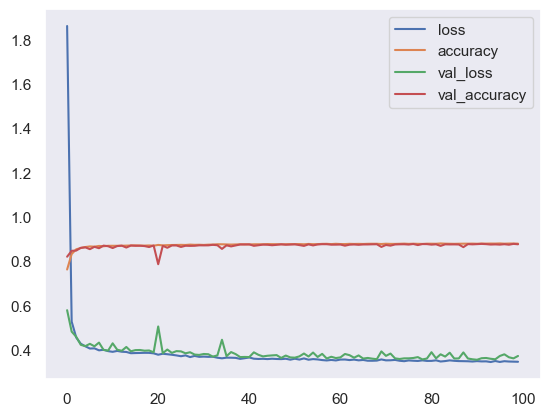

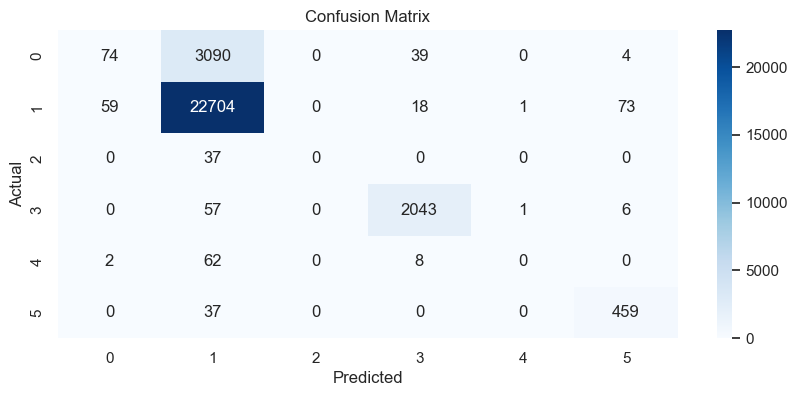

In [230]:
pd.DataFrame(model12_history.history).plot()
yp = model12.predict(X_test).argmax(axis=1)
accuracyAnn, precisionAnn, recallAnn, f1Ann = classification_report_metrics(y_test,yp)
models4.append([Model("Model-3",accuracyAnn, precisionAnn, recallAnn, f1Ann),tac])
plt.show()

In [231]:
drawTable(models4)

,Training Accuracy,Precisioon,recall,F1 Score
Model Name,,,,
Model-1,0.878,0.837,0.878,0.836
Model-2,0.876,0.849,0.876,0.826
Model-3,0.879,0.841,0.879,0.830


In [136]:
import ipywidgets as widgets


name_label = widgets.Label(value="Temperature(C)")
name_input = widgets.Text()
email_label = widgets.Label(value="Apparent Temperature (C)")
email_input = widgets.Text()
password_label = widgets.Label(value="Humidity")
password_input = widgets.Text()
age_label = widgets.Label(value="Wind Speed (km/hr)")
age_input = widgets.Text()
gender_label = widgets.Label(value="Wind Bearing (Degree)")
gender_input = widgets.Text()
country_label = widgets.Label(value="Visibilty")
country_input = widgets.Text()
favorite_color_label = widgets.Label(value="Precip Type")
favorite_color_input = widgets.Dropdown(options=['rain','snow'])
submit_button = widgets.Button(description="Predict")
label_1 = widgets.Label(value="Prediction by model 1 is : _____________*", style={'margin-left': '100px'}, font="bold")
label_2 = widgets.Label(value="Prediction by model 2 is : _____________*", font="bold")
label_3 = widgets.Label(value="Prediction by model 3 is : _____________*", font="bold")

     



form = widgets.VBox([name_label, name_input, email_label, email_input, password_label, password_input, age_label, age_input, gender_label, gender_input, country_label, country_input, favorite_color_label, favorite_color_input, label_1, label_2, label_3, submit_button])

def submit_form(button):
    mapping = {'rain':0,'snow':1}
    values = {
        "Precip Type": [mapping[favorite_color_input.value]],
        "Temperature(C)": [name_input.value],
        "Apparent Temperature (C)": [email_input.value],
        "Humidity": [password_input.value],
        "Wind Speed (km/hr)": [age_input.value],
        "Wind Bearing (Degree)": [gender_input.value],
        "Visibility": [country_input.value],
    }
    mapping = {0:'Clear',1: 'Cloudy',2: 'Dry', 3:'Foggy',4: 'Rain',5: 'Windy'}

    df = pd.DataFrame(values)
    display(df)
    df = scaler.transform(df.values)
    display(df)
    pred1 = model8.predict(df)
    label_1.value = f'Prediction by model 1 is : {mapping[int(pred1)]}*'
    print(pred1)
    pred1 = model7.predict(df)
    print(pred1)
    label_2.value = f'Prediction by model 2 is : {mapping[int(pred1)]}*'
    pred1= model10.predict(df)
    pred1= pred1[0]
    pred1=list(pred1)
    print(pred1)
    maximum=pred1[0]
    index=0
    for i in range(len(pred1)):
        if pred1[i]>maximum:
            maximum = pred1[i]
            index=i
    
    pred1=maximum
    print(pred1)
    label_3.value= f'Prediction by model 3 is : {mapping[index]}*'
    

submit_button.on_click(submit_form)

display(form)


In [137]:
# # array([0.1,0.7,0.2])
# # m = -1
# # for i in range(len(a)):
# #     if a[i]>m:
# #         index = i
# #         m = max(m,a[i])

# # mapping[index]
# maping = {'rain':0,'snow':1}
# values = {
#     "Precip Type": [maping[favorite_color_input.value]],
#     "Temperature(C)": [name_input.value],
#     "Apparent Temperature (C)": [email_input.value],
#     "Humidity": [password_input.value],
#     "Wind Speed (km/hr)": [age_input.value],
#     "Wind Bearing (Degree)": [gender_input.value],
#     "Visibility": [country_input.value],
#     }
# mapping = {0:'Clear',1: 'Cloudy',2: 'Dry', 3:'Foggy',4: 'Rain',5: 'Windy'}
# df = pd.DataFrame(values)
# display(df)
# df = scaler.transform(df.values)
# model11.predict(df)